# Visualization
- matplotlib
- seaborn
- others

In [1]:
import numpy as np

In [2]:
import statsmodels.api as sm
dat = sm.datasets.get_rdataset("Guerry", "HistData").data

In [3]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   dept             86 non-null     int64  
 1   Region           85 non-null     object 
 2   Department       86 non-null     object 
 3   Crime_pers       86 non-null     int64  
 4   Crime_prop       86 non-null     int64  
 5   Literacy         86 non-null     int64  
 6   Donations        86 non-null     int64  
 7   Infants          86 non-null     int64  
 8   Suicides         86 non-null     int64  
 9   MainCity         86 non-null     object 
 10  Wealth           86 non-null     int64  
 11  Commerce         86 non-null     int64  
 12  Clergy           86 non-null     int64  
 13  Crime_parents    86 non-null     int64  
 14  Infanticide      86 non-null     int64  
 15  Donation_clergy  86 non-null     int64  
 16  Lottery          86 non-null     int64  
 17  Desertion        8

### One of the oldest packages is matplotlib (vs ggplot in R)
- only strenght is that it can do pretty much anything

In [4]:
import matplotlib.pyplot as plt
options = {"figsize":(8,8), "dpi":100}

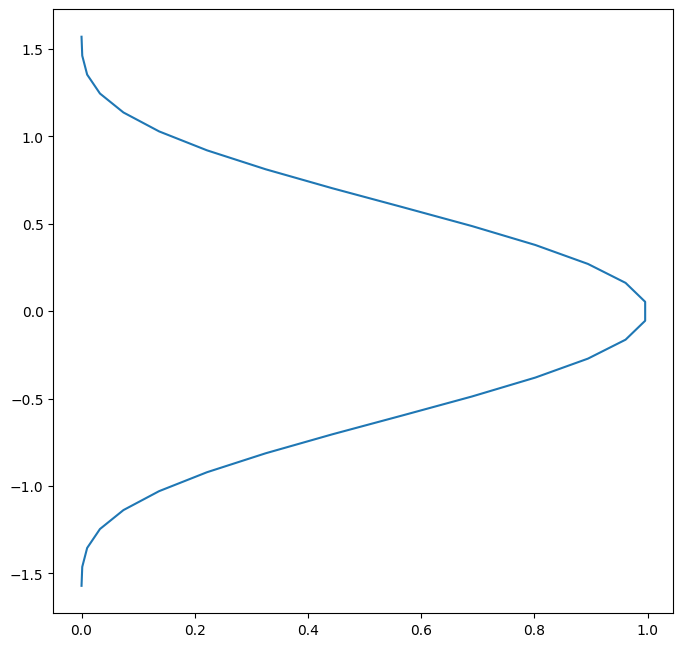

In [5]:
fig, ax = plt.subplots(1,1,**options)
x = np.linspace(-np.pi/2, np.pi/2, 30)
y = np.cos(x)**3
#plt.plot(x, y)
plt.plot(y, x)

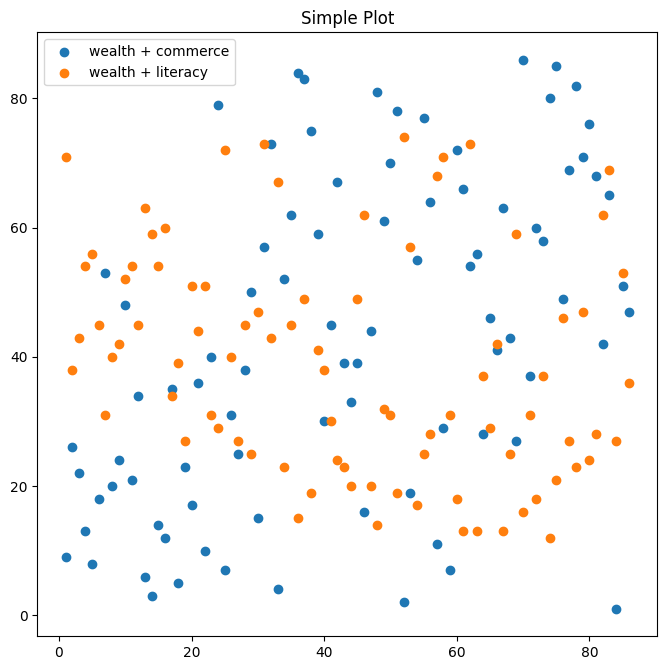

In [6]:
fig, ax = plt.subplots(1,1,**options)

plt.scatter(dat.Wealth, dat.Commerce, label = 'wealth + commerce')
plt.scatter(dat.Wealth, dat.Literacy, label = 'wealth + literacy')

plt.title("Simple Plot")
ax.legend()

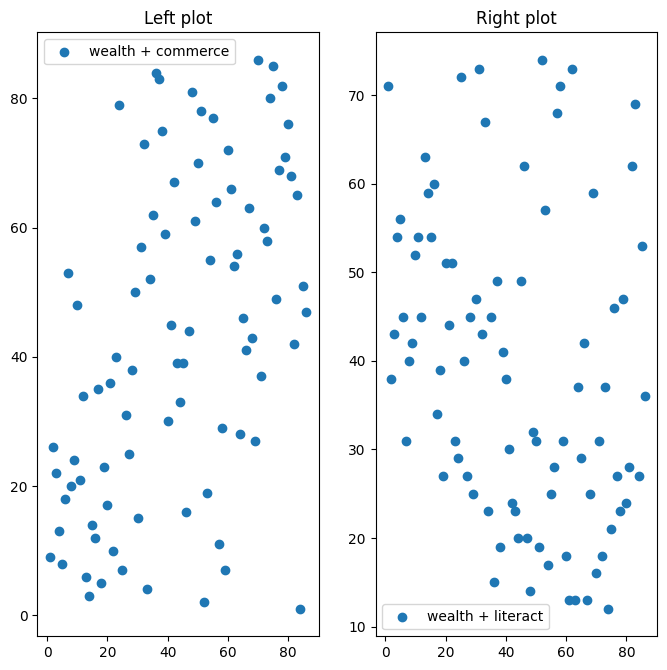

In [7]:
fig, (ax1, ax2) = plt.subplots(1,2,**options)
ax1.scatter(dat.Wealth, dat.Commerce, label = 'wealth + commerce')
ax1.set_title('Left plot')
ax2.scatter(dat.Wealth, dat.Literacy, label = 'wealth + literact')
ax2.set_title('Right plot')
ax1.legend()
ax2.legend()

### Seaborn is a more user-friendly on top of matplotlib 

In [8]:
import seaborn as sns
sns.set_theme(style="ticks")

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


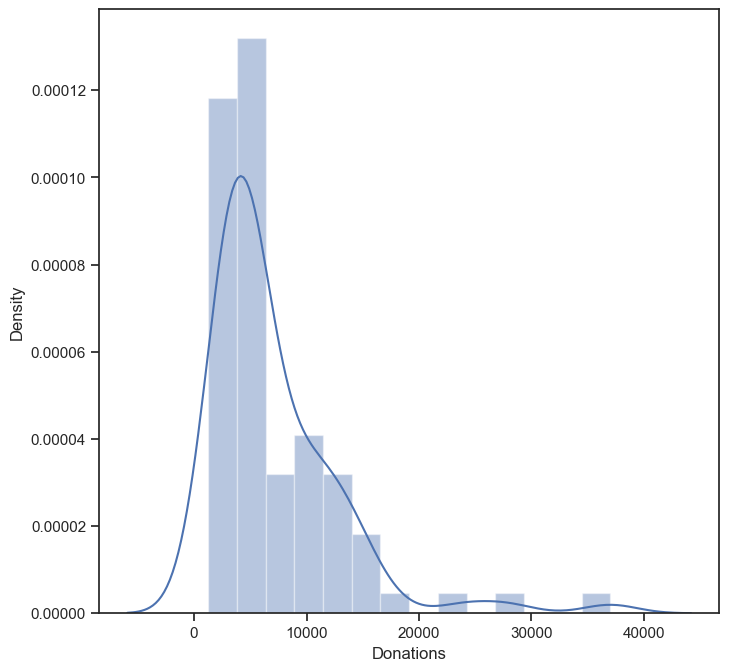

In [9]:
fig, ax = plt.subplots(1,1,**options)
sns.distplot(dat.Donations);

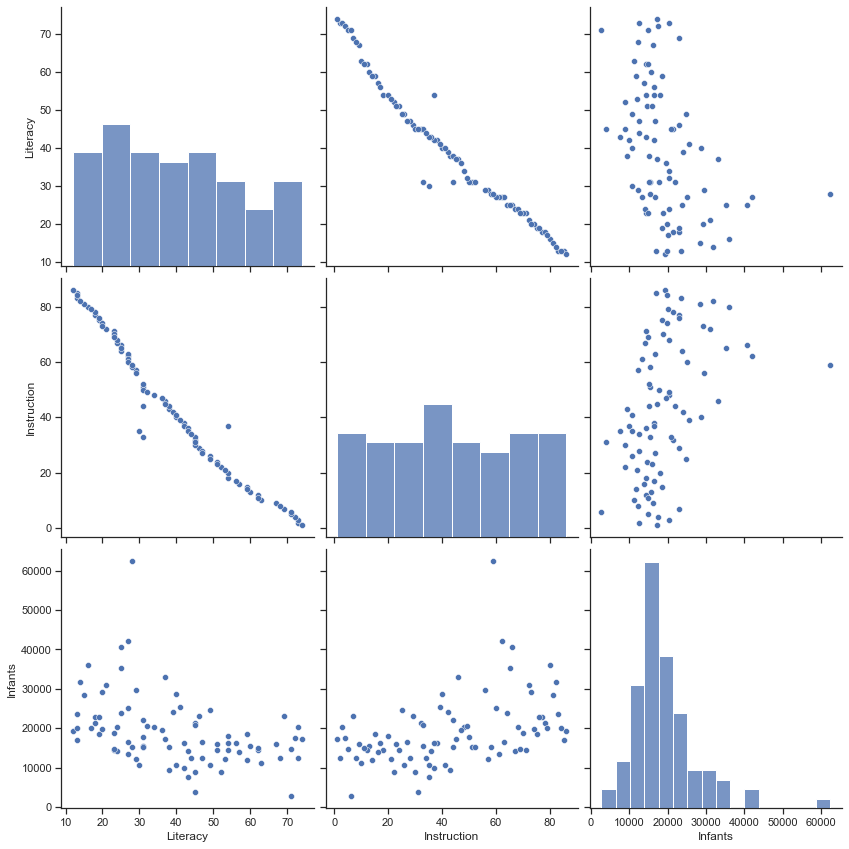

In [10]:
sns.pairplot(dat[['Literacy', 'Instruction', 'Infants']], height = 4)

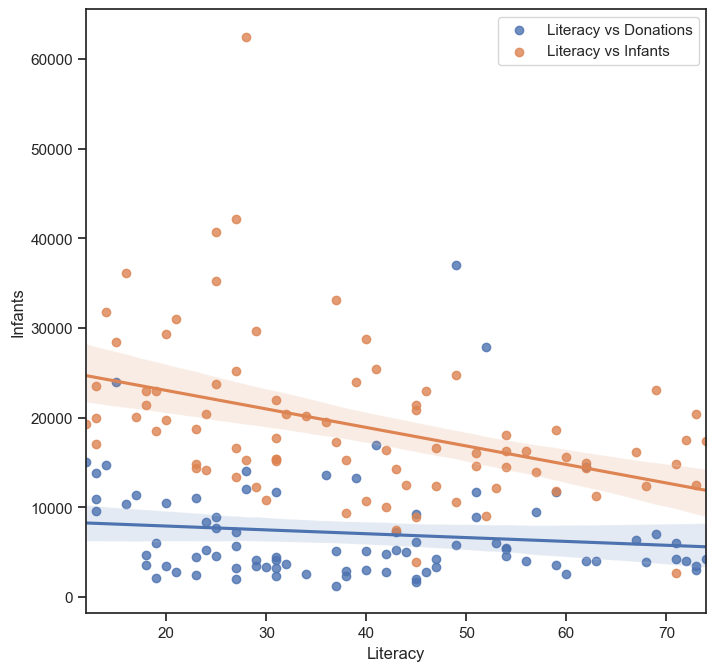

In [11]:
fig, ax = plt.subplots(1,1,**options)

sns.regplot(x="Literacy", y="Donations", data=dat, label = 'Literacy vs Donations')
sns.regplot(x="Literacy", y="Infants", data=dat, label = 'Literacy vs Infants')

ax.legend()

### More exotic packages

In [17]:
#!pip install yellowbrick

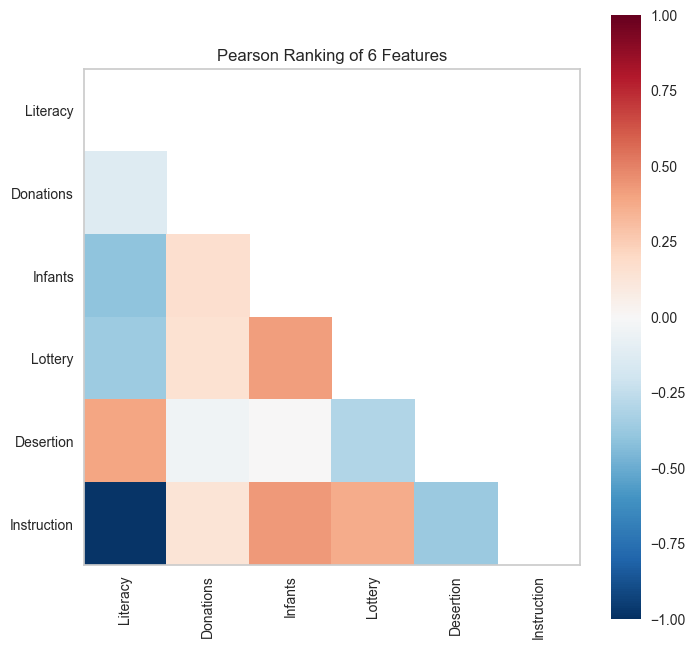

<AxesSubplot:title={'center':'Pearson Ranking of 6 Features'}>

In [18]:
from yellowbrick.datasets import load_credit
from yellowbrick.features import Rank2D

# Load the credit dataset
X, y = load_credit()

# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(algorithm='pearson')

X = dat[['Literacy', 'Donations', 'Infants', 'Lottery', 'Desertion', 'Instruction']]
Y = dat.Commerce

fig, ax = plt.subplots(1,1,**options)
visualizer.fit(X, Y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()              # Finalize and render the figure

### See the gallery https://python-graph-gallery.com/